In [3]:
from matplotlib import rc
import pandas as pd
import matplotlib.pyplot as plt
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

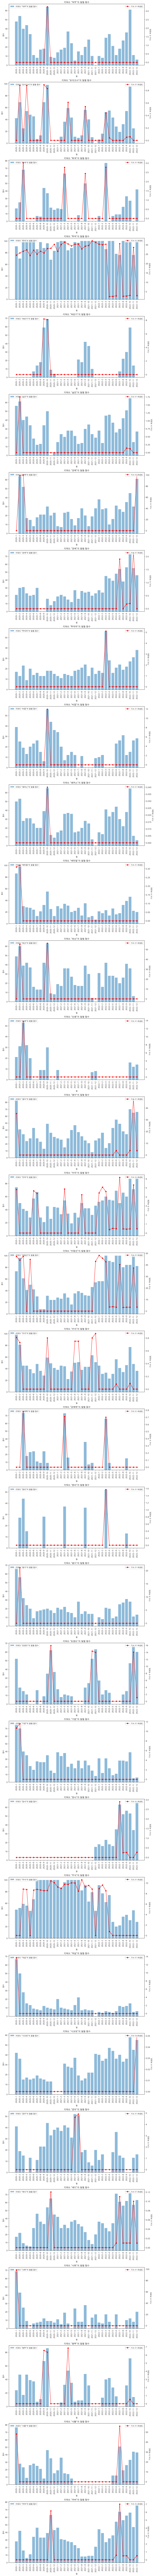

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("book_dt.csv")
data1 = pd.read_csv("tf_book_data.csv")

# 데이터에서 키워드의 unique 리스트 추출
keywords = list(set(data['키워드']))

# 월별 점수 계산
years = np.arange(2020, 2023)  # 2022년부터 2026년까지
months = np.arange(1, 13)  # 1월부터 12월까지

fig, axes = plt.subplots(len(keywords), figsize=(12, 6 * len(keywords)))

for i, keyword in enumerate(keywords):
    ax1 = axes[i]
    
    scores = []
    article_percentages = []
    
    for year in years:
        for month in months:
            month_data = data[(data['연도'] == year) & (data['월'] == month)]
            keyword_data = month_data[month_data['키워드'] == keyword]
            month_data1 = data1[(data1['연도'] == year) & (data1['월'] == month)]
            keyword_data1 = month_data1[month_data1['키워드'] == keyword]
            month_scores = keyword_data1['점수'].values[0] if len(keyword_data1) > 0 else 0
            scores.append(month_scores)
            if len(keyword_data) > 0:
                article_percentage = keyword_data['기사 수 퍼센트'].values[0]
            else:
                article_percentage = 0
            article_percentages.append(article_percentage)
    
    # 막대 그래프
    ax1.bar(np.arange(1, len(years) * len(months) + 1), scores, alpha=0.5, label=f'키워드 "{keyword}"의 월별 점수')
    
    # 막대 그래프 설정
    ax1.set_xlabel('월')
    ax1.set_ylabel('점수')
    ax1.set_title(f'키워드 "{keyword}"의 월별 점수')
    ax1.set_xticks(np.arange(1, len(years) * len(months) + 1))
    ax1.set_xticklabels([f'{year}-{month}' for year in years for month in months], rotation=90)
    ax1.legend(loc='upper left')

    # 기사 수 퍼센트
    ax2 = ax1.twinx()
    ax2.plot(np.arange(1, len(years) * len(months) + 1), list(article_percentages), marker='o', color='red')
    ax2.set_ylabel('기사 수 퍼센트')
    ax2.legend(['기사 수 퍼센트'], loc='upper right')


plt.tight_layout()
plt.show()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("book_dt.csv")
data1 = pd.read_csv("tf_book_data.csv")

# 데이터에서 키워드의 unique 리스트 추출
keywords = list(set(data['키워드']))

# 월별 점수 계산
years = np.arange(2020, 2023)  # 2022년부터 2026년까지
months = np.arange(1, 13)  # 1월부터 12월까지

for keyword in keywords:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    scores = []
    article_percentages = []

    for year in years:
        for month in months:
            month_data = data[(data['연도'] == year) & (data['월'] == month)]
            keyword_data = month_data[month_data['키워드'] == keyword]
            month_data1 = data1[(data1['연도'] == year) & (data1['월'] == month)]
            keyword_data1 = month_data1[month_data1['키워드'] == keyword]
            month_scores = keyword_data1['점수'].values[0] if len(keyword_data1) > 0 else 0
            scores.append(month_scores)
            if len(keyword_data) > 0:
                article_percentage = keyword_data['기사 수 퍼센트'].values[0]
            else:
                article_percentage = 0
            article_percentages.append(article_percentage)

    # 막대 그래프
    ax1.bar(np.arange(1, len(years) * len(months) + 1), scores, alpha=0.5, label=f'키워드 "{keyword}"의 월별 점수')

    # 막대 그래프 설정
    ax1.set_xlabel('월')
    ax1.set_ylabel('점수')
    ax1.set_title(f'키워드 "{keyword}"의 월별 점수')
    ax1.set_xticks(np.arange(1, len(years) * len(months) + 1))
    ax1.set_xticklabels([f'{year}-{month}' for year in years for month in months], rotation=90)
    ax1.legend(loc='upper left')

    # 기사 수 퍼센트
    ax2 = ax1.twinx()
    ax2.plot(np.arange(1, len(years) * len(months) + 1), list(article_percentages), marker='o', color='red')
    ax2.set_ylabel('기사 수 퍼센트')
    ax2.legend(['기사 수 퍼센트'], loc='upper right')

    # 그래프 이미지 저장
    plt.savefig(f'graph_{keyword}.png')
    plt.close()

print("그래프 이미지가 저장되었습니다.")


그래프 이미지가 저장되었습니다.
